# 離散化の考え方

## ボールの軌道

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
g  = 9.8
v0 = 10
h0 = 0
dt = .1

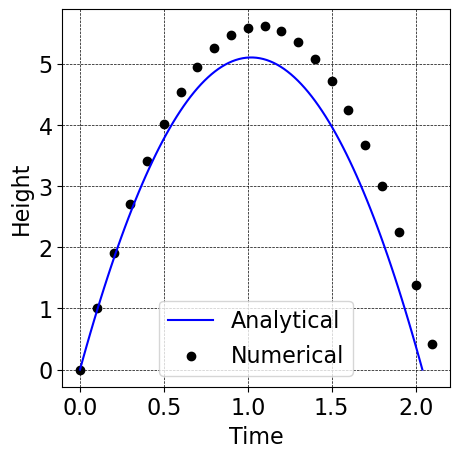

In [26]:

plt.figure(figsize = (5, 5), dpi = 100)
plt.rcParams["font.size"] = 16

# 解析解
t = np.linspace(0, 2 * v0 / g, 100)
# ニュートンの第二法則より
h = -0.5 * g * t ** 2 + v0 * t + h0 
# これでpltのオブジェクトがハンドリングができるらしい・・・
la, = plt.plot(t, h, color = "blue") 

# 数値解
t = 0
h = h0
while h >= h0:
    # 都度都度でプロットをしている
    ln  = plt.scatter(t, h, marker = "o", c = "black") 
    h  += (-g * t + v0) * dt
    t  += dt

# グラフの後処理
plt.grid(color = "black", linestyle = "dashed", linewidth = .5)
plt.xlabel("Time")
plt.ylabel("Height")
# ラベルを使わないならば，la, lnはオブジェクトに保存しておかなくても良いきがする
plt.legend(handles = [la, ln], labels = ["Analytical", "Numerical"])
plt.show()

大きくずれているように見える。
これに対して，$dt=.02$で計算してみる. 

In [27]:
g  = 9.8
v0 = 10
h0 = 0
dt = .02

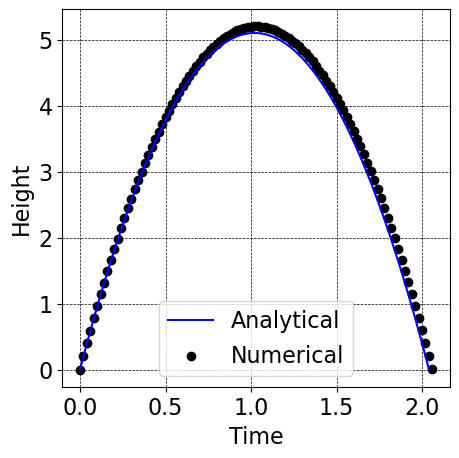

In [28]:

plt.figure(figsize = (5, 5), dpi = 100)
plt.rcParams["font.size"] = 16

# 解析解
t = np.linspace(0, 2 * v0 / g, 100)
# ニュートンの第二法則より
h = -0.5 * g * t ** 2 + v0 * t + h0 
# これでpltのオブジェクトがハンドリングができるらしい・・・
la, = plt.plot(t, h, color = "blue") 

# 数値解
t = 0
h = h0
while h >= h0:
    # 都度都度でプロットをしている
    ln  = plt.scatter(t, h, marker = "o", c = "black") 
    h  += (-g * t + v0) * dt
    t  += dt

# グラフの後処理
plt.grid(color = "black", linestyle = "dashed", linewidth = .5)
plt.xlabel("Time")
plt.ylabel("Height")
# ラベルを使わないならば，la, lnはオブジェクトに保存しておかなくても良いきがする
plt.legend(handles = [la, ln], labels = ["Analytical", "Numerical"])
plt.show()

一方で，微分値を$t_1,t_2$の中間点の値を使う。これは$dt$の幅を小さくしても，まったく正確な値になる. 

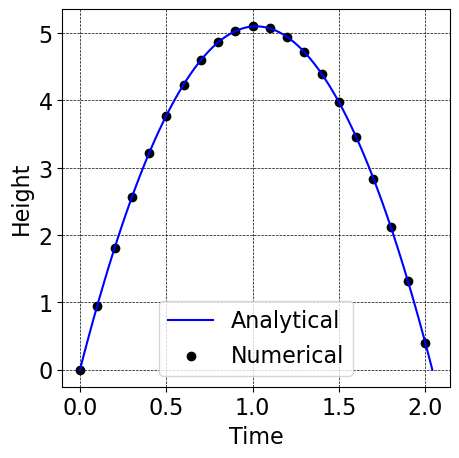

In [29]:
g  = 9.8
v0 = 10
h0 = 0
dt = .1

plt.figure(figsize = (5, 5), dpi = 100)
plt.rcParams["font.size"] = 16

# 解析解
t = np.linspace(0, 2 * v0 / g, 100)
# ニュートンの第二法則より
h = -0.5 * g * t ** 2 + v0 * t + h0 
# これでpltのオブジェクトがハンドリングができるらしい・・・
la, = plt.plot(t, h, color = "blue") 

# 数値解
t = 0
h = h0
while h >= h0:
    # 都度都度でプロットをしている
    ln  = plt.scatter(t, h, marker = "o", c = "black") 
    h  += (-g * (t + dt/2) + v0) * dt
    t  += dt

# グラフの後処理
plt.grid(color = "black", linestyle = "dashed", linewidth = .5)
plt.xlabel("Time")
plt.ylabel("Height")
# ラベルを使わないならば，la, lnはオブジェクトに保存しておかなくても良いきがする
plt.legend(handles = [la, ln], labels = ["Analytical", "Numerical"])
plt.show()